# 热力图绘制

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [33]:
# load数据集
flights = sns.load_dataset("flights")
flights.head()

In [46]:
# 透视表
df=pd.pivot_table(flights,index=["month"], columns=["year"], values=["passengers"],aggfunc=np.sum)
df.head()
# df['passengers']

passengers                                                       
year           1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960
month                                                                     
January         112  115  145  171  196  204  242  284  315  340  360  417
February        118  126  150  180  196  188  233  277  301  318  342  391
March           132  141  178  193  236  235  267  317  356  362  406  419
April           129  135  163  181  235  227  269  313  348  348  396  461
May             121  125  172  183  229  234  270  318  355  363  420  472

## 默认参数绘制

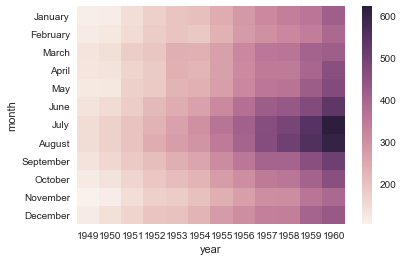

In [65]:
sns.heatmap(df['passengers'])

## 自定义参数绘制

### annot：显示data_value

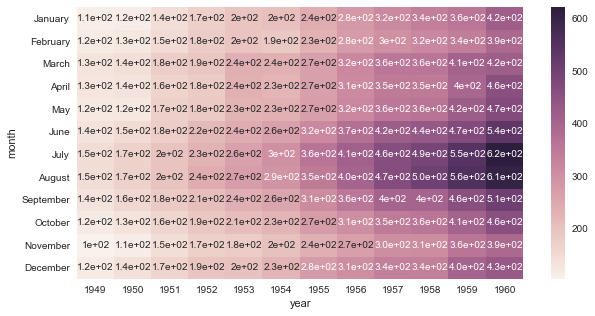

In [59]:
# 放大图像
f,ax=plt.subplots(figsize=(10,5))

# annot:write the data value in each cell 
# fmt:formate the data 
sns.heatmap(df['passengers'], annot=True, ax=ax)

### fmt：value类型转换

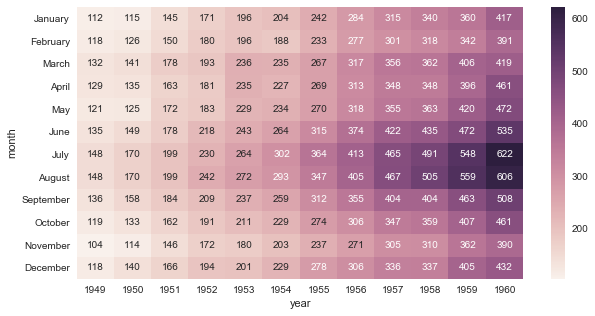

In [61]:
# fmt:formate the data 
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df['passengers'], annot=True, fmt="d",ax=ax)

### vmin，vmax：尺度控制

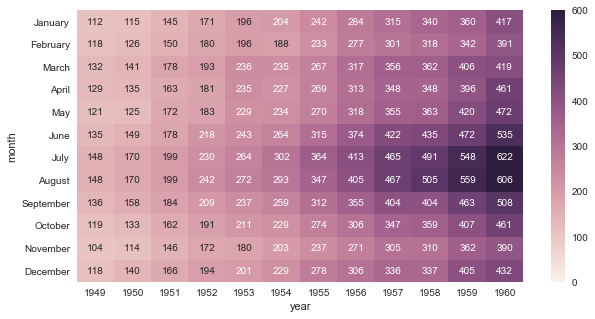

In [69]:
# vmin,vmax：Values to anchor the colormap
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df['passengers'], annot=True, fmt="d",vmin=0, vmax=600,ax=ax)

### center：设置标尺中心点

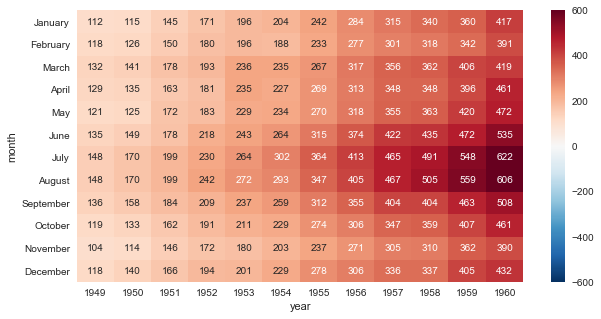

In [71]:
# center:The value at which to center the colormap when plotting divergant data.
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df['passengers'], annot=True, fmt="d",vmin=0, vmax=600,center=0,ax=ax)

### linewidths：设置cell的边界

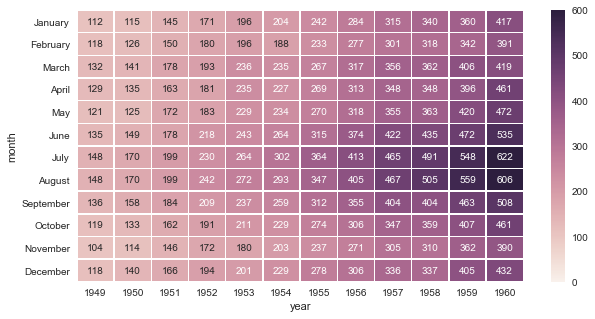

In [73]:
# linewidths：Width of the lines that will divide each cell
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df['passengers'], annot=True, fmt="d",vmin=0, vmax=600,linewidths=.5,ax=ax)

### cmap：单元格颜色

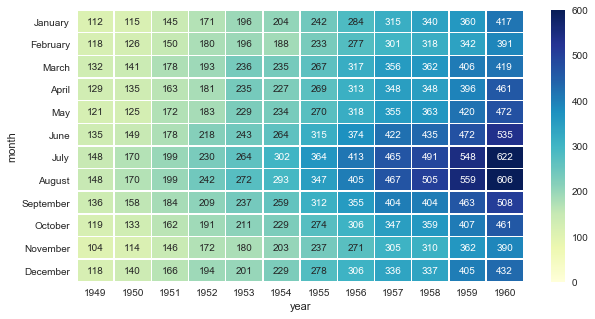

In [75]:
# cmap:The mapping from data values to color space
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df['passengers'], annot=True, fmt="d",vmin=0, vmax=600,linewidths=.5,cmap="YlGnBu",ax=ax)

### cbar：colorbar

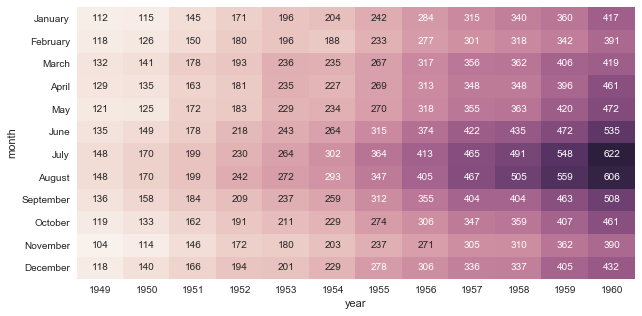

In [81]:
# cbar：默认是True，表示画出colorbar
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df['passengers'], annot=True, fmt="d",cbar=False,ax=ax)

### mask：显示子图

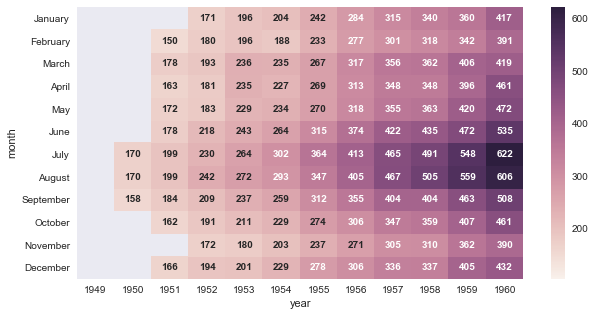

In [58]:
# 通过mast参数指定显示哪些cell，True或False
f,ax=plt.subplots(figsize=(10,5))
# df<200 判断cell中的value跟200的逻辑大小，返回True或False
sns.heatmap(df['passengers'], mask=df<150,annot=True, fmt="d", ax=ax,annot_kws={"weight": "bold"})

### 条件匹配

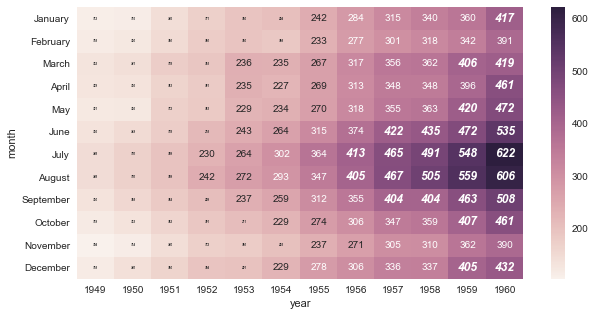

In [48]:
# 突出某些cell
f,ax=plt.subplots(figsize=(10,5))
pic = sns.heatmap(df['passengers'], annot=True, fmt="d", ax=ax)

# 当data_value大于400时，增大字体并加黑
# 当data_value小于200时，缩小字体
for text in pic.texts:
    text.set_size(10)
    if text.get_text() >= '400':
        text.set_size(12)
        text.set_weight('bold')
        text.set_style('italic')
    if text.get_text() <= '220':
        text.set_size(3)
        text.set_weight('bold')
        text.set_style('italic')